# Course 8: Data Viz in Python:

## Intro 2 Matplotlib:
* Artist Layers
* Scripting Layers

In [65]:
import numpy as np
import pandas as pd
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas 
from matplotlib.figure import Figure

In [66]:
fig = Figure()
canvas = FigureCanvas(fig)

In [67]:
# Creating your data
x = np.random.randn(10000)

### Scripting Layer:
* Artist layers is more directed for programmers not data scientists
* Data Scientists better use the scripting layer, such as `pyplot` which is a scripting interface lighter than the artist layer


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/normhistPLT.png'

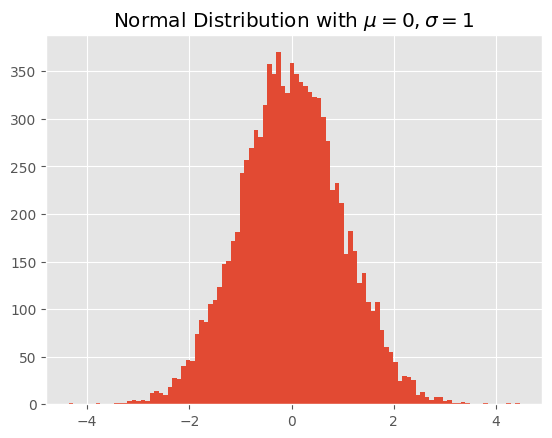

In [68]:
import matplotlib.pyplot as plt
plt.hist(x, 100)
plt.title('Normal Distribution with $\mu=0, \sigma = 1$')
plt.savefig('Dataset/normhistPLT.png')

### Basic Plotting Using Matplot:
* `plt.plot()` function:
* pandas

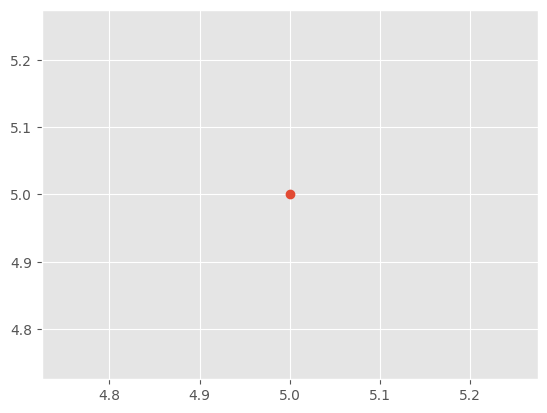

In [69]:
plt.plot(5, 5, 'o') #plotting a simple dot

In [70]:
df = pd.DataFrame({
    'India': [8880, 8670, 8147, 7338, 5704],
    'China': [5123, 6682, 3308, 1863, 1527]
})
df

,India,China
0,8880,5123
1,8670,6682
2,8147,3308
3,7338,1863
4,5704,1527


## Canada Immegration Data:

### Area Plots:

In [71]:
can_df = pd.read_csv('Datasets/canada.csv')
can_df = can_df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1)
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OdName    197 non-null    object
 1   AreaName  197 non-null    object
 2   RegName   197 non-null    object
 3   DevName   197 non-null    object
 4   1980      197 non-null    int64 
 5   1981      197 non-null    int64 
 6   1982      197 non-null    int64 
 7   1983      197 non-null    int64 
 8   1984      197 non-null    int64 
 9   1985      197 non-null    int64 
 10  1986      197 non-null    int64 
 11  1987      197 non-null    int64 
 12  1988      197 non-null    int64 
 13  1989      197 non-null    int64 
 14  1990      197 non-null    int64 
 15  1991      197 non-null    int64 
 16  1992      197 non-null    int64 
 17  1993      197 non-null    int64 
 18  1994      197 non-null    int64 
 19  1995      197 non-null    int64 
 20  1996      197 non-null    int64 
 21  1997      197 no

In [72]:
can_df.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace = True)
can_df.set_index('Country', inplace = True)
can_df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [73]:
all(isinstance(column, str) for column in can_df.columns)

True

In [74]:
can_df['total'] = can_df.sum(axis = 1, numeric_only = True)
can_df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [75]:
print('Data Dimensions: ',can_df.shape)

Data Dimensions:  (197, 38)


In [76]:
years = list(map(str, range(1980, 2014)))

In [77]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.style.use('ggplot')

In [78]:
can_df.sort_values(['total'], ascending = False, axis = 0, inplace = True)

can_top5 = can_df.head()

can_top5 = can_top5[years].transpose()

can_top5

Country,Total,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown
1980,143137,8880,5123,22045,44000
1981,128641,8670,6682,24796,18078
1982,121175,8147,3308,20620,16904
1983,89185,7338,1863,10015,13635
1984,88272,5704,1527,10170,14855
1985,84346,4211,1816,9564,14368
1986,99351,7150,1960,9470,13303
1987,152075,10189,2643,21337,17304
1988,161585,11522,2758,27359,22279
1989,191550,10343,4323,23795,27118


Text(0.5, 0, 'Years')

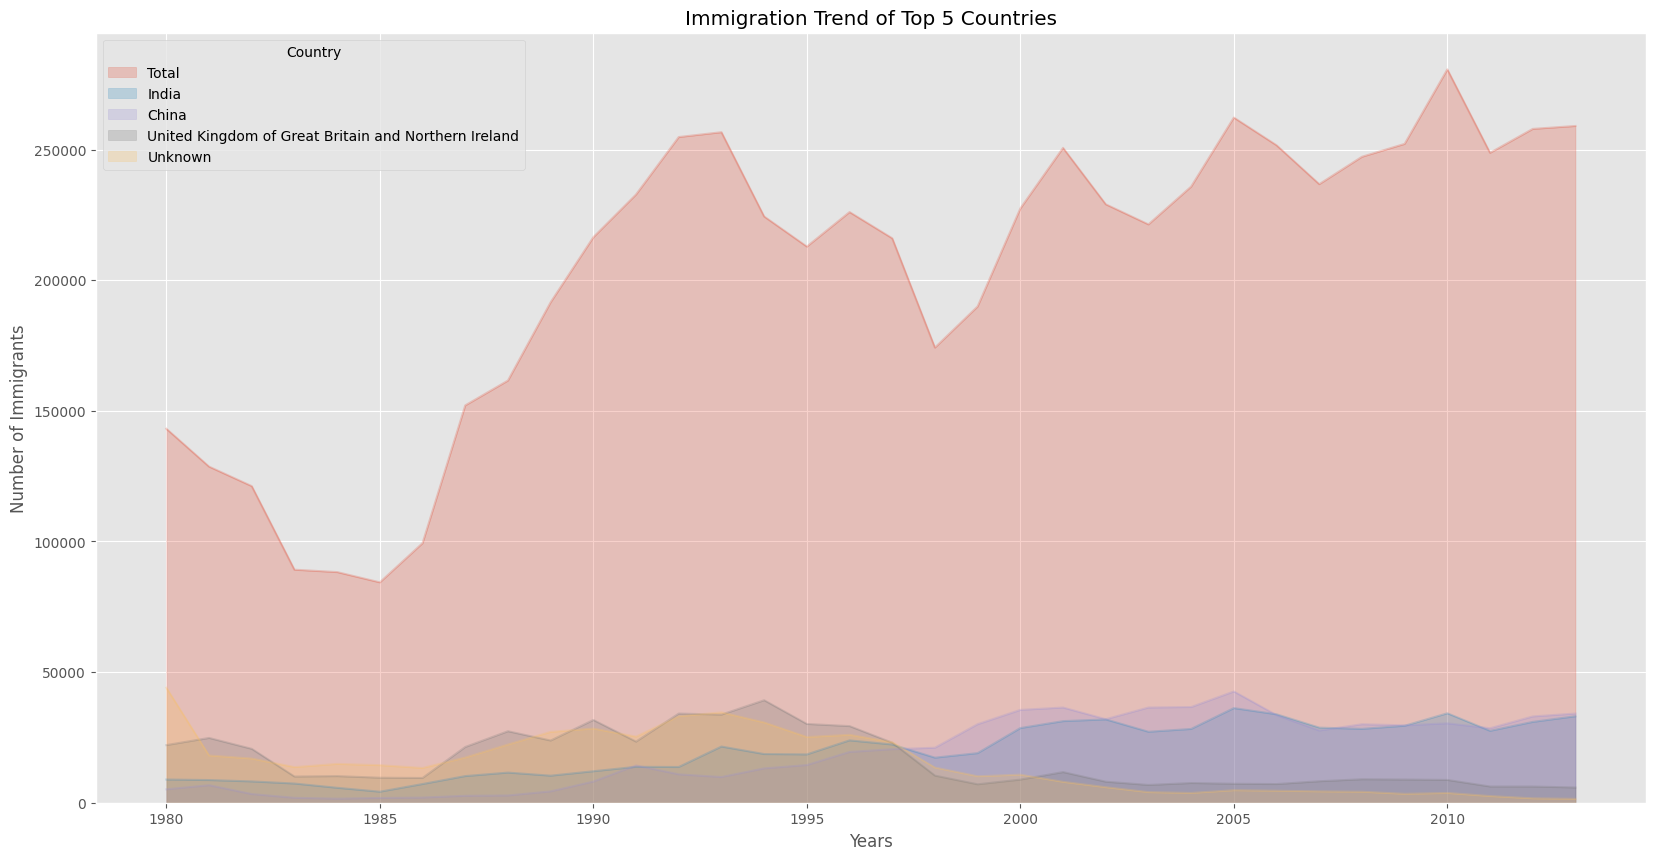

In [79]:
can_top5.index = can_top5.index.map(int)
can_top5.plot(kind = 'area',
              alpha = 0.25,
             stacked = False,
             figsize = (20, 10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

In [80]:
can_df['2013'].head()

Country
Total                                                   259021
India                                                    33087
China                                                    34129
United Kingdom of Great Britain and Northern Ireland      5827
Unknown                                                   1484
Name: 2013, dtype: int64

In [2]:
pip install folium

     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     -------------- ---------------------- 41.0/102.3 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 102.3/102.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import folium
Canada = folium.Map(location = [56.130, -106.35]
           , zoom_start = 4
          , tiles = 'Stamen Terrain'
          )

In [35]:
ON = folium.map.FeatureGroup()
ON.add_child(folium.features.CircleMarker([51.25, -85.32], 
                                         raius = 2,
                                         color = 'red',
                                         fill_color = 'red'))

In [36]:
Canada.add_child(ON)

In [37]:
folium.Marker([51.2, -85.32],
             popup = 'Ontario').add_to(Canada)

In [38]:
Canada

In [39]:
folium.Map(location=[40.4637, -3.7492], zoom_start=6, tiles='Stamen Terrain')